### DESCRIPTION

Cardiovascular diseases are one of the leading causes of deaths globally. To identify the causes and develop a system to predict potential heart attacks in an effective manner is necessary. The data presented has all the information about relevant factors that might have an impact on cardiovascular health. The data needs to be studied in detail for further analysis.

In [65]:
# starting off with importing the required libraries to be used in our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import scipy as sp
import plotly.express as px

In [119]:
# importing the dataset using pandas

heart_df = pd.read_excel('D:/01 Documents/01 Learning/01 Data Analytics - Simplilearn/Data Analytics/09 Capstone Project/1585743985_datasets_healthcare/data.xlsx')

In [120]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [121]:
vars_desc = pd.read_excel('D:/01 Documents/01 Learning/01 Data Analytics - Simplilearn/Data Analytics/09 Capstone Project/1585743985_datasets_healthcare/variable description.xlsx')

In [122]:
vars_desc

,variable,description
0,age,age in years
1,sex,(1 = male; 0 = female)
2,cp,chest pain type
3,trestbps,resting blood pressure (in mm Hg on admission...
4,chol,serum cholestoral in mg/dl
5,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; ...
6,restecg,resting electrocardiographic results
7,thalach,maximum heart rate achieved
8,exang,exercise induced angina (1 = yes; 0 = no)
9,oldpeak,ST depression induced by exercise relative to...


In [123]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [124]:
# check for any null values in the columns
heart_df.isnull().sum()
# below results shows there are no null values in the dataset

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [125]:
# the dataset has got 303 rows and 14 attributes
heart_df.shape

(303, 14)

In [126]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [127]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [128]:
#based on the variable description there are 9 catergorical and 5 numerical data types so changing them from numeric to 
# categorical

categorical_variables = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
numerical_cols = ["age","trtbps","chol","thalachh","oldpeak"]

target_col=['target']
for col in categorical_variables:
    heart_df[col] = heart_df[col].astype('category')


In [129]:
# now lets check the datatypes of the dataset
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        303 non-null    category
 12  thal      303 non-null    category
 13  target    303 non-null    int64   
dtypes: category(8), float64(1), int64(5)
memory usage: 17.8 KB


**Visualising Numerical Data**

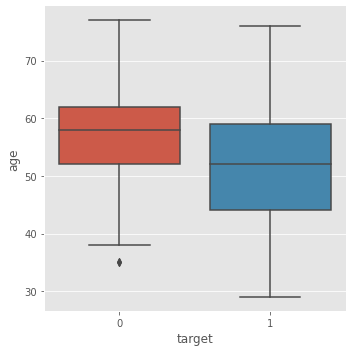

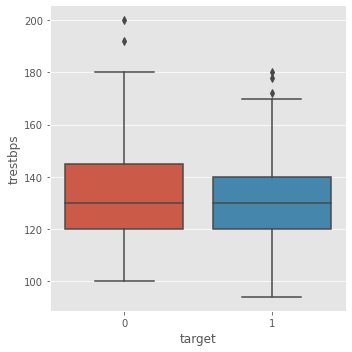

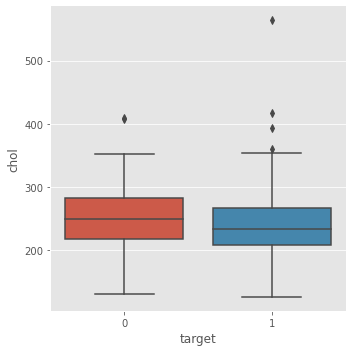

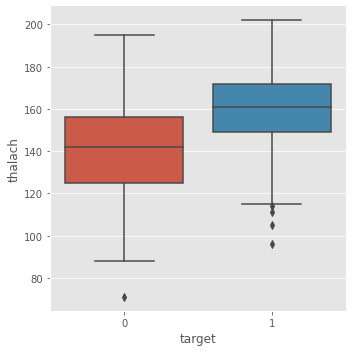

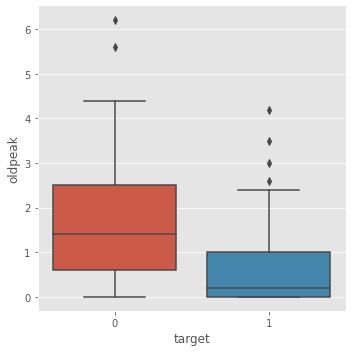

In [130]:
sns.catplot(x="target", y="age", data=heart_df, kind="box")
sns.catplot(x="target", y="trestbps", data=heart_df, kind="box")
sns.catplot(x="target", y="chol", data=heart_df, kind="box")
sns.catplot(x="target", y="thalach", data=heart_df, kind="box")
sns.catplot(x="target", y="oldpeak", data=heart_df, kind="box");

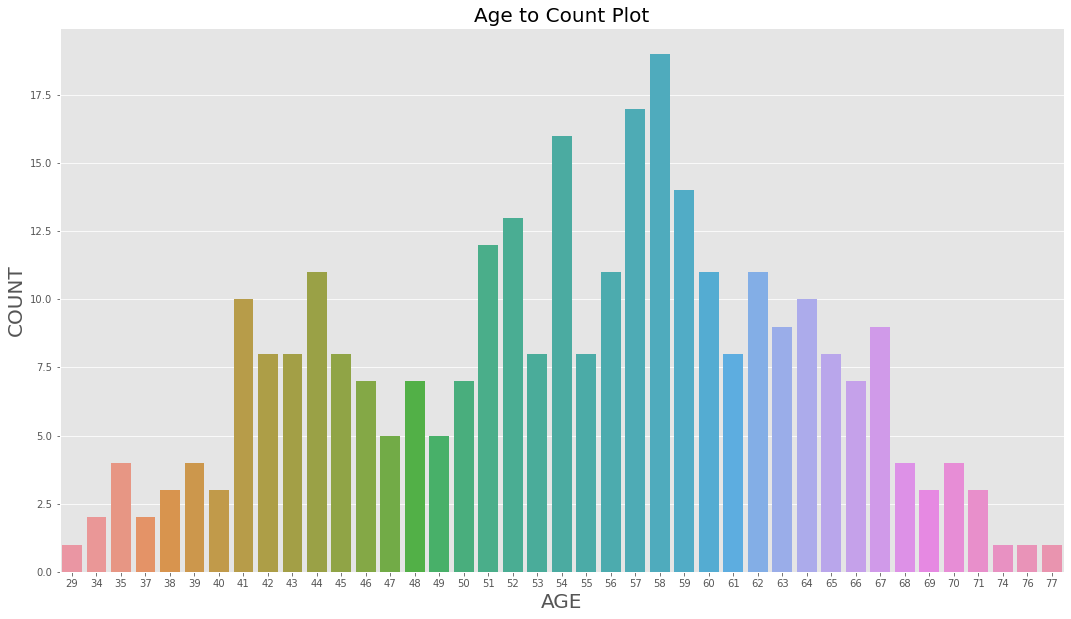

In [26]:
plt.figure(figsize=(18,10))
plt.style.use("ggplot")
sns.countplot(x=heart_df["age"])    #using countplot
plt.title("Age to Count Plot",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

**People age above 40 and below 68 are more likely to get heart attack. People at the age of 58 are highly prone to heart attacks.**

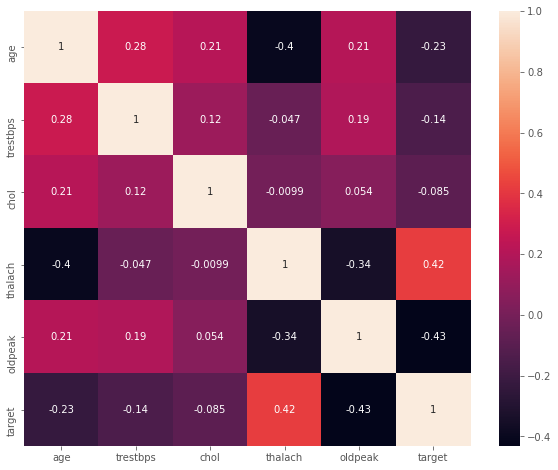

In [39]:
#  plot the correlations between variables and their relations with target varibales

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(heart_df.corr(),annot=True,ax=ax)

**Above heatmap shows that age and tresbps are not affecting heart attack as both have a -ve correlation**

In [58]:
import plotly.express as px
data=heart_df["sex"].value_counts().reset_index()
px.pie(data,names=["Male","Female"],values='sex',color_discrete_sequence=px.colors.sequential.RdBu)


**Males are more likely to have heart attack that females**

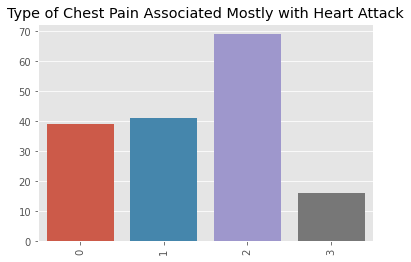

In [69]:
# Type of chest Pain Associated Mostly with Heart Attack

df_heartattack= heart_df[heart_df['target']==1]
ax = sns.barplot(
    x = df_heartattack['cp'].value_counts().head(10).keys(), 
    y = df_heartattack['cp'].value_counts().head(10).values
)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

plt.title('Type of Chest Pain Associated Mostly with Heart Attack')
plt.show()

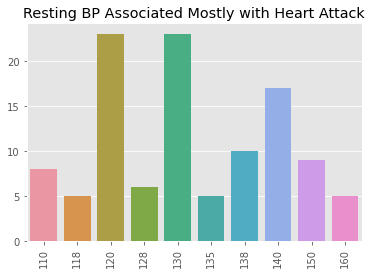

In [72]:
# Resting BP Associated Mostly with Heart Attack

df_heartattack= heart_df[heart_df['target']==1]
ax = sns.barplot(
    x = df_heartattack['trestbps'].value_counts().head(10).keys(), 
    y = df_heartattack['trestbps'].value_counts().head(10).values
)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

plt.title('Resting BP Associated Mostly with Heart Attack')
plt.show()

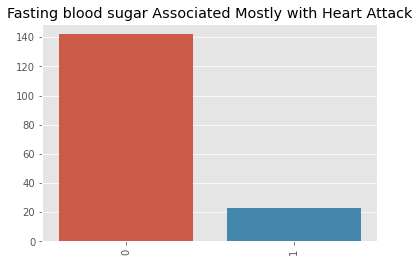

In [73]:
# Fasting blood sugar Associated Mostly with Heart Attack

df_heartattack= heart_df[heart_df['target']==1]
ax = sns.barplot(
    x = df_heartattack['fbs'].value_counts().head(10).keys(), 
    y = df_heartattack['fbs'].value_counts().head(10).values
)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

plt.title('Fasting blood sugar Associated Mostly with Heart Attack')
plt.show()

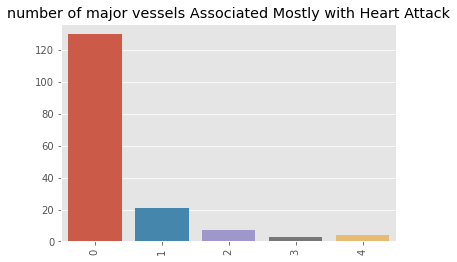

In [76]:
# number of major vessels Associated Mostly with Heart Attack

df_heartattack= heart_df[heart_df['target']==1]
ax = sns.barplot(
    x = df_heartattack['ca'].value_counts().head(10).keys(), 
    y = df_heartattack['ca'].value_counts().head(10).values
)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

plt.title('number of major vessels Associated Mostly with Heart Attack')
plt.show()

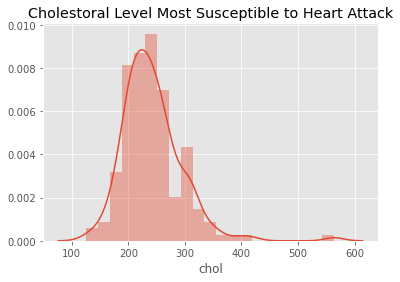

In [79]:
# Cholestoral Level Most Susceptible to Heart Attack

df_heartattack= heart_df[heart_df['target']==1]
sns.distplot(df_heartattack['chol'],kde = True)

plt.title('Cholestoral Level Most Susceptible to Heart Attack')
plt.show()

**Cholestoral in the range of 180-280 has got maximum change of heart attack**

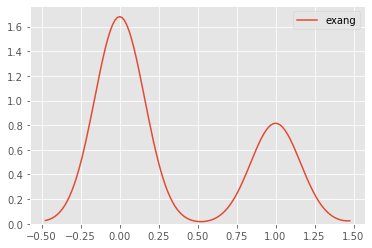

In [101]:
sns.kdeplot(heart_df['exang']== 1)

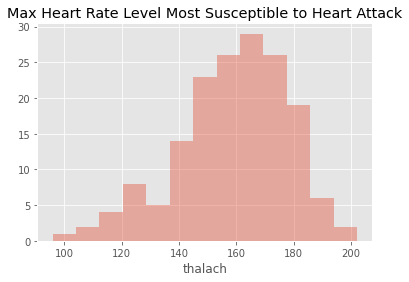

In [108]:
# Max Heart Rate Most Susceptible to Heart Attack

df_heartattack= heart_df[heart_df['target']==1]
sns.distplot(df_heartattack['thalach'],kde = False)

plt.title('Max Heart Rate Level Most Susceptible to Heart Attack')
plt.show()

**Heart rate in the range of 145-180 are in the maximum risk of a heart attack**

**Model Building**

In [109]:
output=heart_df['target']
output

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [110]:
heart_df.drop(['target'],axis=1,inplace=True)
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


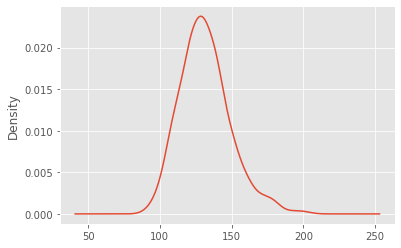

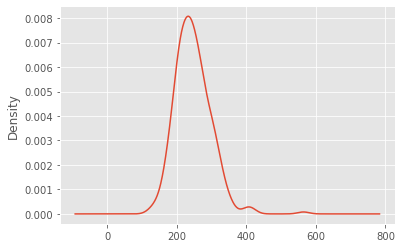

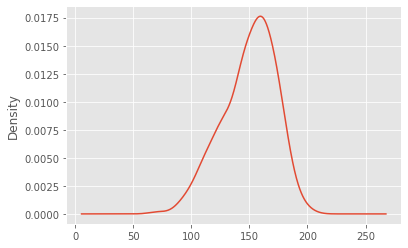

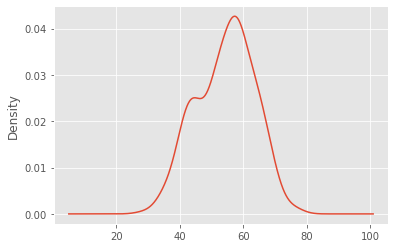

In [111]:
#checking skewness

heart_df['trestbps'].plot(kind='density')
plt.show()
heart_df['chol'].plot(kind='density')
plt.show()
heart_df['thalach'].plot(kind='density')
plt.show()
heart_df['age'].plot(kind='density')
plt.show()

In [112]:
#splitting of dataset

x_train,x_test,y_train,y_test=train_test_split(heart_df,output,test_size=0.1,random_state=42)

In [113]:
logistic=LogisticRegression(max_iter=100,random_state=1,n_jobs=-1)
logistic.fit(x_train,y_train)
pred1=logistic.predict(x_test)
pred1

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [114]:
logistic.score(x_train,y_train)*100

85.66176470588235

In [115]:
logistic.score(x_test,y_test)*100

80.64516129032258

In [116]:
from sklearn.metrics import accuracy_score

print('Logistic Regresson model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred1)))

Logistic Regresson model accuracy score: 0.8065


**This model has an accuracy of 80.65**%